In [16]:
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [17]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [18]:
len(X_train)

60000

In [19]:
len(X_test)

10000

In [20]:
X_test[0].shape

(28, 28)

Digit class: 5


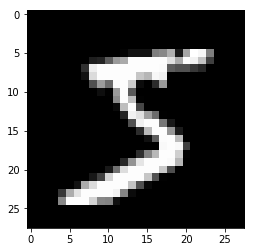

In [21]:
plt.imshow(X_train[0], 'gray')
print("Digit class:", y_train[0])

In [22]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [23]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train, 10) # 10 classes to codify
Y_test = np_utils.to_categorical(y_test, 10)

Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [36]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.core import Flatten

traintensor = X_train.reshape(60000, 28, 28, 1)
testtensor = X_test.reshape(10000, 28, 28, 1)

traintensor.shape

(60000, 28, 28, 1)

In [32]:
img_rows = 28
img_cols = 28
kernel_size = 3
pool_size = 2

model = Sequential()

model.add(Convolution2D(16, (kernel_size, kernel_size),
                        padding='valid',
                        input_shape=(img_rows, img_cols, 1)))
model.add(Activation('relu'))

#model.add(Convolution2D(32, (kernel_size, kernel_size)))
#model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

In [33]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

model_history = model.fit(
    traintensor,
    Y_train,
    batch_size=128,
    epochs=20,
    verbose=2,
    validation_data=(testtensor, Y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 31s - loss: 0.3980 - acc: 0.8794 - val_loss: 0.1272 - val_acc: 0.9608
Epoch 2/20
 - 28s - loss: 0.1743 - acc: 0.9474 - val_loss: 0.0811 - val_acc: 0.9742
Epoch 3/20
 - 28s - loss: 0.1334 - acc: 0.9601 - val_loss: 0.0645 - val_acc: 0.9791
Epoch 4/20
 - 29s - loss: 0.1107 - acc: 0.9666 - val_loss: 0.0592 - val_acc: 0.9806
Epoch 5/20
 - 29s - loss: 0.0985 - acc: 0.9696 - val_loss: 0.0511 - val_acc: 0.9834
Epoch 6/20
 - 29s - loss: 0.0888 - acc: 0.9729 - val_loss: 0.0469 - val_acc: 0.9842
Epoch 7/20
 - 31s - loss: 0.0790 - acc: 0.9763 - val_loss: 0.0495 - val_acc: 0.9839
Epoch 8/20
 - 34s - loss: 0.0746 - acc: 0.9774 - val_loss: 0.0423 - val_acc: 0.9852
Epoch 9/20
 - 34s - loss: 0.0691 - acc: 0.9781 - val_loss: 0.0399 - val_acc: 0.9864
Epoch 10/20
 - 25s - loss: 0.0642 - acc: 0.9793 - val_loss: 0.0393 - val_acc: 0.9863
Epoch 11/20
 - 23s - loss: 0.0612 - acc: 0.9806 - val_loss: 0.0393 - val_acc: 0.9864
Epoch 12/20
 - 23s - los

10000/10000 [==============================] - 3s 302us/step
Test loss 0.03549052565697784
Test accuracy 0.989


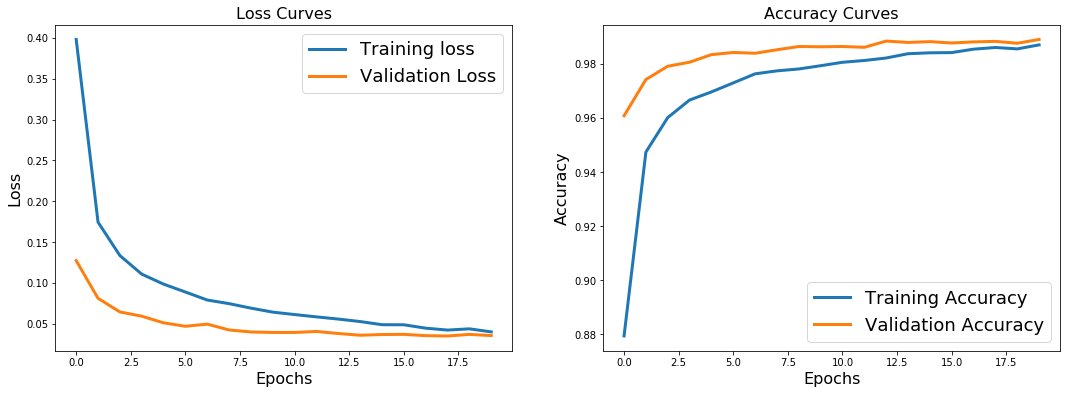

In [34]:
preds = model.predict_classes(testtensor)

score = model.evaluate(testtensor, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

plt.figure(figsize=(18,6))

# Loss Curves
plt.subplot(1,2,1)
plt.plot(model_history.history['loss'], linewidth=3.0)
plt.plot(model_history.history['val_loss'], linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'], fontsize=18)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)

# Accuracy Curves
plt.subplot(1,2,2)
plt.plot(model_history.history['acc'], linewidth=3.0)
plt.plot(model_history.history['val_acc'], linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=18)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

In [35]:
from keras.models import load_model

model.save('MNIST_model.h5')